# Task 1: Data Preparation

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('hotel_bookings.csv')
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0.0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [109]:
data.shape

(119392, 32)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119392 entries, 0 to 119391
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119392 non-null  object 
 1   is_canceled                     119391 non-null  float64
 2   lead_time                       119392 non-null  int64  
 3   arrival_date_year               119392 non-null  int64  
 4   arrival_date_month              119391 non-null  object 
 5   arrival_date_week_number        119392 non-null  int64  
 6   arrival_date_day_of_month       119392 non-null  int64  
 7   stays_in_weekend_nights         119392 non-null  int64  
 8   stays_in_week_nights            119392 non-null  int64  
 9   adults                          119392 non-null  int64  
 10  children                        119388 non-null  float64
 11  babies                          119392 non-null  int64  
 12  meal            

In [111]:
data.isna().sum()

hotel                                  0
is_canceled                            1
lead_time                              0
arrival_date_year                      0
arrival_date_month                     1
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              490
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Observed that agent and company has the most na values.
### dropping rows with na values in agent or company would impact the quantity of data at a scale so we just fill the agent and company with 0.

In [112]:
data['agent'] = data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)

### For children columns we are going to fill na values with 0 assuming no children were there with them.

In [113]:
data['children'] = data['children'].fillna(0)

### Country of customer would be proved as an important feature of dataset making assumptions on this feature would hinder data integrity so Dropping rows with no country data 

In [114]:
data.dropna(subset=['country'], inplace=True)

### For is_cancelled column we can refer to reservation_status as observed below and fill na value with corrosponding status where reservation_status is canceled or no show it sums up to is_canceled  = 1(YES) and checkout sum is nearly equal to is_canceled = 0(NO)


In [115]:
data['reservation_status'].value_counts()

reservation_status
Check-Out    74745
Canceled     42954
No-Show       1203
Name: count, dtype: int64

In [116]:
data['is_canceled'].value_counts()

is_canceled
0.0    74744
1.0    44157
Name: count, dtype: int64

In [117]:
data['is_canceled']=data['is_canceled'].fillna(0)

### For arrival date month we can refer to arrival week number because we can calculate which month that week number lies

### Because it is only 1 row so we are going to manually fill the value calculated for that month

In [118]:
nan_row = data[data['arrival_date_month'].isna()].index
year = data.loc[nan_row[0],'arrival_date_year']
week_num = data.loc[nan_row[0],'arrival_date_week_number']
date_num = data.loc[nan_row[0],'arrival_date_day_of_month']
pd.to_datetime(f'{year}-W{week_num}-1', format='%Y-W%W-%w').month_name()

'September'

In [119]:
data['arrival_date_month'] = data["arrival_date_month"].fillna('September')

In [120]:
data.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


## Dropping duplicated rows

In [121]:
data.duplicated().sum()

np.int64(31956)

In [122]:
data = data.drop_duplicates()

## Standardization

### I am going to format certain columns to better data types which could be helpful for further processing

In [123]:
fix_date_index = data[data['reservation_status_date'] == 'Dec 1, 2016'].index

data.loc[fix_date_index, 'reservation_status_date'] = pd.to_datetime('1/12/2016', format='%d/%m/%Y')

In [124]:
data["reservation_status_date"] = pd.to_datetime(
    data["reservation_status_date"], format="%d/%m/%Y"
)
data['meal'] = data['meal'].astype('category')
data['market_segment'] = data['market_segment'].astype('category')
data['distribution_channel'] = data['distribution_channel'].astype('category')

In [125]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'Sep', 'sep', 'October', 'November',
       'December', '12', 'January', 'February', '2', 'Feb', 'March',
       'April', 'May', 'June'], dtype=object)

### In the above output we could see some inconsistency in naming of months We are going to standardize all months with full month name only.

In [126]:
data.loc[data['arrival_date_month'].str.lower() == 'sep', ['arrival_date_month']] = 'September'
data.loc[(data['arrival_date_month'] == 'Feb') | (data['arrival_date_month'] == '2'), ['arrival_date_month']] = 'February'
data.loc[data["arrival_date_month"] == "12",["arrival_date_month"]] = "December"

In [127]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [128]:
data.to_csv('hotel_bookings_cleaned.csv', index=False)

# Task 2: Data Exploration

In [129]:
data_cleaned = pd.read_csv('hotel_bookings_cleaned.csv')
data_2016 = data_cleaned[data_cleaned['arrival_date_year'] == 2016].copy()

In [130]:
data_2016['arrival_date_month'] = data_2016['arrival_date_month'].astype('category')

In [131]:
data_2016["arrival_date_month"]

3127      January
3128      January
3129      January
3130      January
3131      January
           ...   
74204    December
74207    December
74210    December
74211    December
74275    December
Name: arrival_date_month, Length: 42126, dtype: category
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

In [132]:
# Order the categories in the desired order
# Reference : https://github.com/Aarhus-Psychiatry-Research/psycop-model-training/blob/47ba767b02ecbd564fb872eba9fa3e022226c596/src/psycop_model_training/model_eval/base_artifacts/plots/performance_over_time.py

data_2016["arrival_date_month"] = pd.Categorical(
    data_2016["arrival_date_month"],
    categories=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    ordered=True,
)

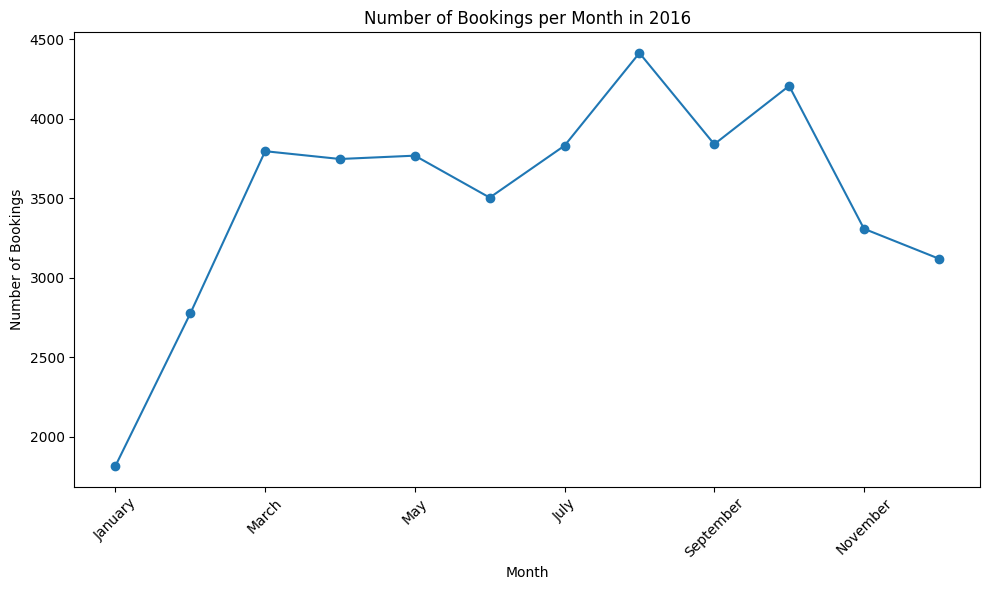

In [133]:
# Plotting the number of bookings per month
plt.figure(figsize=(10, 6))
data_2016['arrival_date_month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Bookings per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### In above graph we see massive spike in booking from january to march and we could see most bookings done were in August and November month

In [134]:
# Monthly cancellation data
monthly_cancellation_data = data_2016.groupby("arrival_date_month").agg({'is_canceled': 'sum'})['is_canceled']

C:\Users\Chakshu\AppData\Local\Temp\ipykernel_15588\4022610970.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



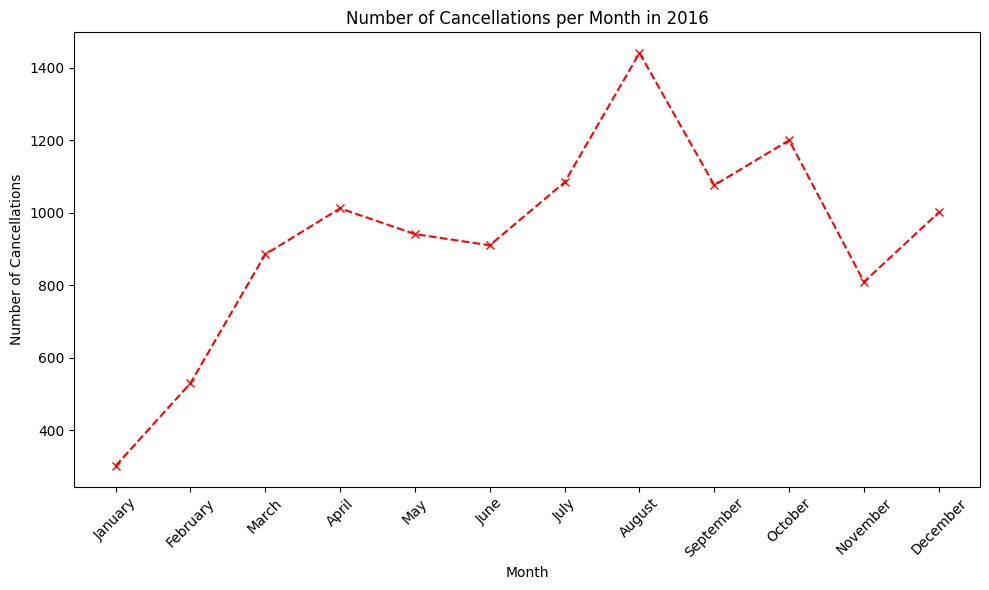

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellation_data.index, monthly_cancellation_data.values, marker='x', linestyle='--', color='red', label='Cancellations')
plt.title("Number of Cancellations per Month in 2016")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### In the above graph we can observe that cancellation is also following the same pattern that of number of bookings and in August month we can see around 1400 bookings got cancelled out of approximate 3500 bookings done in the similar month

### Surprisingly in December The rate of number of bookings were falling but the number of cancellations observed a little spike in the same month in comparison to November

In [136]:
# Average lead time per month
monthly_avg_lead_time = data_2016.groupby("arrival_date_month").agg(
    {"lead_time": "mean"}
)["lead_time"]

C:\Users\Chakshu\AppData\Local\Temp\ipykernel_15588\1596062972.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



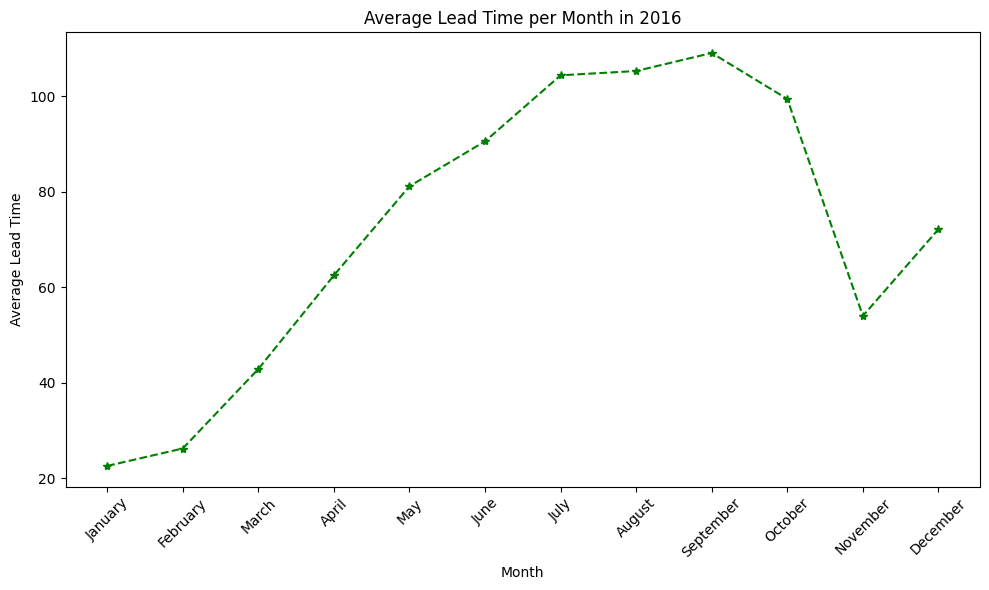

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_avg_lead_time.index,
    monthly_avg_lead_time.values,
    marker="*",
    linestyle="--",
    color="green",
    label="Average Lead Time",
)
plt.title("Average Lead Time per Month in 2016")
plt.xlabel("Month")
plt.ylabel("Average Lead Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 2

In [138]:
data_analysis = data_cleaned[
    data_cleaned["arrival_date_year"].isin([2015, 2016, 2017])
].copy()

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
data_analysis["arrival_date_month"] = pd.Categorical(
    data_analysis["arrival_date_month"],
    categories=month_order,
    ordered=True,
)

In [139]:
# Creating season column
def get_season(month):
    if month in ["December", "January", "February"]:
        return "Winter"
    elif month in ["March", "April", "May"]:
        return "Spring"
    elif month in ["June", "July", "August"]:
        return "Summer"
    elif month in ["September", "October", "November"]:
        return "Autumn"
    else:
        return "Unknown"


data_analysis["season"] = data_analysis["arrival_date_month"].apply(get_season)

In [140]:
data_analysis["season"].value_counts()

season
Summer    29011
Spring    23673
Autumn    18495
Winter    15765
Name: count, dtype: int64

In [141]:
# Season column also needs to be ordered
season_order = ["Spring", "Summer", "Autumn", "Winter"]
data_analysis["season"] = pd.Categorical(
    data_analysis["season"],
    categories=season_order,
    ordered=True,
)

In [142]:
monthly_bookings_yearly = (
    data_analysis.groupby(["arrival_date_year", "arrival_date_month"])
    .size()
    .reset_index(name="booking_count")
)

seasonal_bookings_yearly = (
    data_analysis.groupby(["arrival_date_year", "season"])
    .size()
    .reset_index(name="booking_count")
)

C:\Users\Chakshu\AppData\Local\Temp\ipykernel_15588\1387877068.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Chakshu\AppData\Local\Temp\ipykernel_15588\1387877068.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



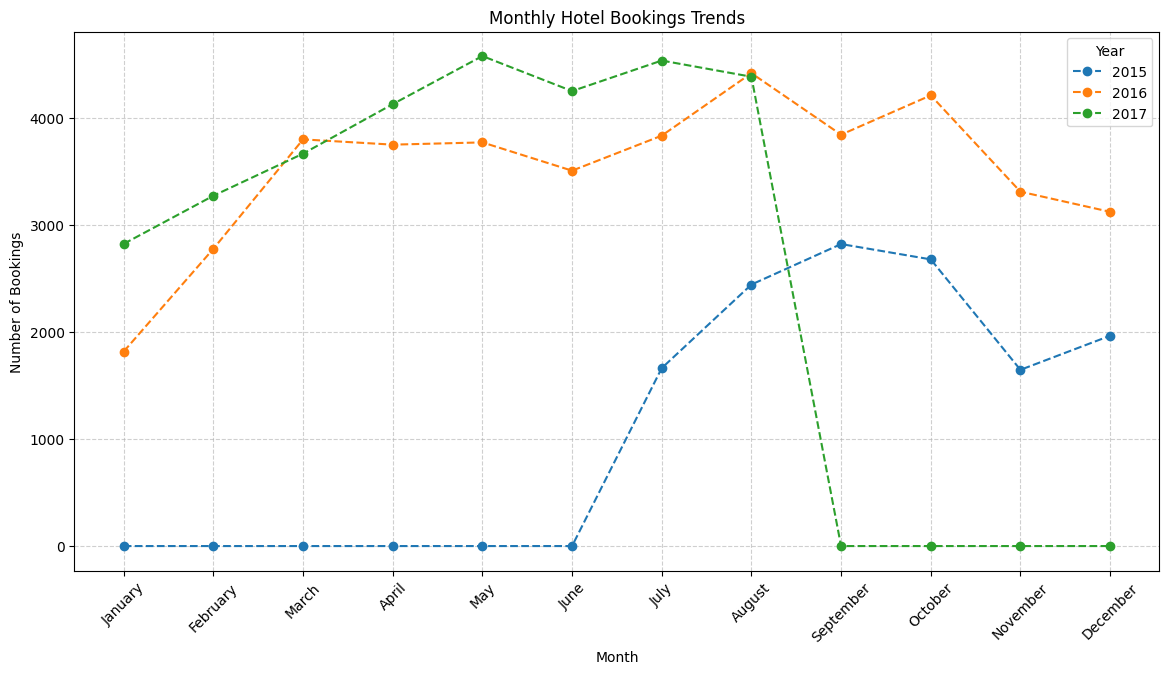

In [143]:
# Plot 1: Monthly Booking Trends by Year (Line Chart)
plt.figure(figsize=(14, 7))
years_to_plot = monthly_bookings_yearly["arrival_date_year"].unique()

for year in years_to_plot:
    year_data = monthly_bookings_yearly[
        monthly_bookings_yearly["arrival_date_year"] == year
    ]
    plt.plot(
        year_data["arrival_date_month"],
        year_data["booking_count"],
        marker="o",
        linestyle="--",
        label=str(year),        
    )
plt.title("Monthly Hotel Bookings Trends")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Year")
plt.show()

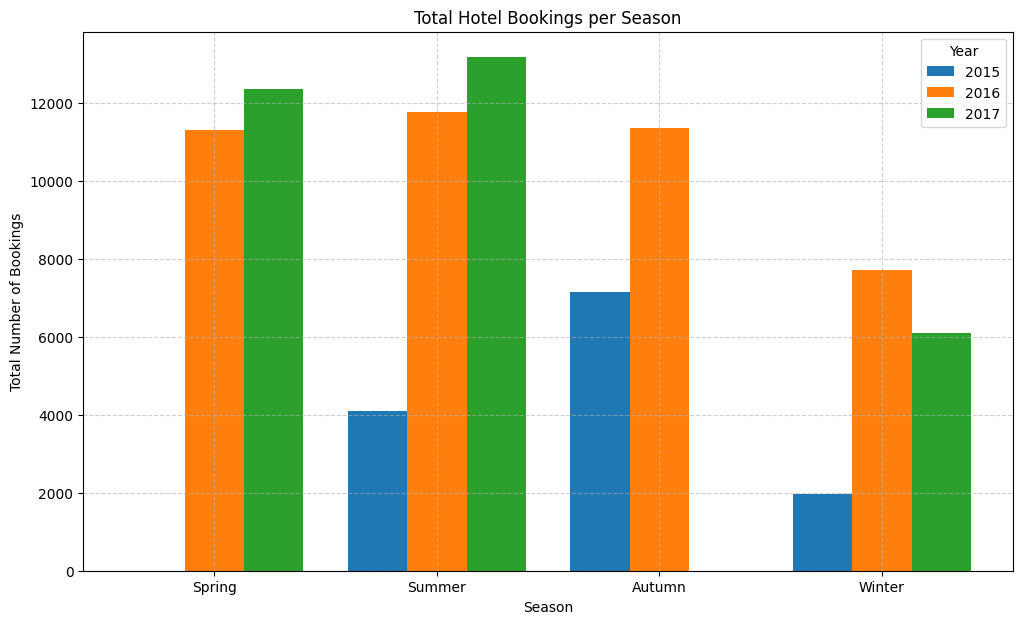

In [144]:
# Seasonal Booking Trends by Year
plt.figure(figsize=(12, 7))

seasons = season_order
years = sorted(seasonal_bookings_yearly["arrival_date_year"].unique())
n_years = len(years)
x = np.arange(len(seasons))
bar_width = 0.8 / n_years

for i, year in enumerate(years):
    # Filter data for the year and ensure it's sorted by the categorical season order
    year_data = (
        seasonal_bookings_yearly[seasonal_bookings_yearly["arrival_date_year"] == year]
        .set_index("season")
        .reindex(season_order)
        .reset_index()
    )

    # Calculate position for this year's bars
    # Center the group of bars around the x tick
    position = x - (n_years - 1) * bar_width / 2 + i * bar_width
    plt.bar(
        position,
        year_data["booking_count"],
        bar_width,
        label=str(year),
    )

plt.title("Total Hotel Bookings per Season")
plt.xlabel("Season")
plt.ylabel("Total Number of Bookings")
plt.xticks(x, seasons)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Year")
plt.show()

### From the above 2 charts we can see monthly and seasonal bookings are directly related. Across various years we can observe that in 2015 the Hotel was growing. In Summer Season and months the bookings are at peak but in winters(December January February) we observe lowest number of bookings

# Question 3

In [145]:
top_5_countries = data_cleaned['country'].value_counts().head()

top5_data = data_cleaned[data_cleaned['country'].isin(top_5_countries.index)].copy()
top5_data['total_length_of_stay'] = top5_data['stays_in_week_nights'] + top5_data['stays_in_weekend_nights']
top5_subset = top5_data.groupby('country').agg({'total_length_of_stay':'sum', 'is_canceled':'sum', 'lead_time':'mean'})
top5_subset['sucessful_booking_ratio'] = top5_subset['total_length_of_stay'] / (top5_subset['total_length_of_stay'] + top5_subset['is_canceled'])
top5_subset

,total_length_of_stay,is_canceled,lead_time,sucessful_booking_ratio
country,,,,
DEU,20556,1053.0,105.089103,0.951270
ESP,22655,1862.0,52.196773,0.924053
FRA,31905,1733.0,74.135906,0.948481
GBR,51262,1985.0,118.310266,0.962721
PRT,84796,9793.0,65.469680,0.896468


### In this table we can interpret that PRT as the most number of bookings and DEU has the least number of bookings amongst all. On the other hand PRT has the lowest successful bookings rate whereas GBR has the highest successful booking ratio also they have high lead time which means that there are less chances of last minute cancellation and more satisfaction and loyality from GBR area. Wherein, ESP has lowest successful booking ratio and their lead_time is also at the lowest. 

### We can summarize that GBR has most loyal customer base to the hotel besides any other country. While PRT region has more frequent customers coming to the hotel and ESP infer to be a highest churning customer base amongst all top 5 countries. DEU happens to be a happy customer besides medium churning as they make bookings way too much time in advance.